In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import configparser
from src.clustering.algorithm_wrappers.KMeansWrapper import KMeansWrapper
from src.clustering.algorithm_wrappers.AgglomerativeWrapper import AgglomorativeWrapper
from src.clustering.algorithm_wrappers.OpticsWrapper import OpticsWrapper
import umap
import matplotlib.pyplot as plt

/home/vera/anaconda3/envs/04-continous-user-feedback/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera/anaconda3/envs/04-continous-user-feedback/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vera/anaconda3/envs/04-conti

In [2]:
config = configparser.ConfigParser()
config.read('../../config.ini')
embedding_path = '../../' + config['DATA']['UserEmbeddingPath']
test_path = '../../' + config['DATA']['TestUserEmbeddingPath']

In [6]:
def draw_umap(data, n_components=2, title=''):
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(data[:,0], range(len(data)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(data[:,0], data[:,1], s=1)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:,0], data[:,1], data[:,2], s=1)
    plt.title(title, fontsize=18)

## Load embeddings

In [3]:
user_embedding = np.load(embedding_path)
test_embedding = np.load(test_path)

## Dimensionality Reduction
The parameters are fixed in config.ini

In [4]:
N_NEIGHBORS= int(config['UMAP']['n_neighbors'])
MIN_DIST= float(config['UMAP']['min_dist'])
N_COMPONENTS= int(config['UMAP']['n_components'])
METRIC=config['UMAP']['metric']

In [5]:
fit = umap.UMAP(
    n_neighbors= N_NEIGHBORS,
    min_dist= MIN_DIST,
    n_components= N_COMPONENTS,
    metric=METRIC
)
user_reduced = fit.fit_transform(user_embedding)
test_reduced = fit.transform(test_embedding)

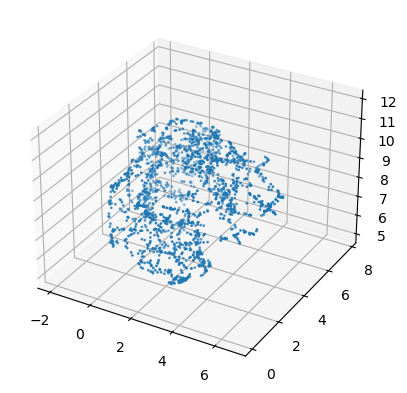

In [10]:
draw_umap(user_reduced, N_COMPONENTS)

## 1. Kmeans
### Train clustering model and find represantant

In [7]:
import pandas as pd
import plotly.express as px
kmeans_model = KMeansWrapper()
kmeans_model.train(user_reduced)
kmeans_model.extract_representations() # return tuple (clusterid, location)
kmeans_model.visualize(user_reduced)
kmeans_model.figure.show()


### Predict user cluster
Predict cluster only for a single user for now

In [13]:
prediction = kmeans_model.predict(test_reduced[0])
print(f"You are labeled as cluster {prediction[0]}")

cluster_representant = kmeans_model.interpret(prediction)
print(f"Your representant lies at {cluster_representant}")
kmeans_model.visualize(user_reduced, test_reduced[0], cluster_representant)
kmeans_model.figure.show()


You are labeled as cluster 26
Your representant lies at [ 2.230479   4.2017493 10.350342 ]


### Suggest alternative

In [14]:
suggestion_label, suggestion_location = kmeans_model.suggest(cluster_representant)
print(f"Would you like to see a user from {suggestion_label}")
kmeans_model.visualize(user_reduced, test_reduced[0], suggestion_location)
kmeans_model.figure.show()


Would you like to see a user from 10


## 2. Agglomorative

In [15]:
agglomorative = AgglomorativeWrapper()
agglomorative.train(user_reduced)
agglomorative.extract_representations(user_reduced)  # return tuple (clusterid, location)
prediction = agglomorative.predict(test_reduced[0])
print(f"You are labeled as cluster {prediction}")

cluster_representant = agglomorative.interpret(prediction)
print(f"Your representant lies at {cluster_representant}")
user_suggestion = agglomorative.suggest(cluster_representant)
print(f"Would you like to see a user from {user_suggestion[0]}")
agglomorative.visualize(user_reduced, test_reduced[0], user_suggestion[1])
agglomorative.figure.show()


You are labeled as cluster 3
Your representant lies at [ 2.33339524  3.35181355 11.13977242]
Would you like to see a user from 2


## 3. OPTICS

In [16]:
optics = OpticsWrapper()
optics.train(user_reduced)

optics.extract_representations(user_reduced)  # return tuple (clusterid, location)
prediction = optics.predict(test_reduced[0])
print(f"You are labeled as cluster {prediction}")

cluster_representant = optics.interpret(prediction)
print(f"Your representant lies at {cluster_representant}")
user_suggestion = optics.suggest(cluster_representant)
print(f"Would you like to see a user from {user_suggestion[0]}")
optics.visualize(user_reduced, test_reduced[0], user_suggestion[1])
optics.figure.show()

You are labeled as cluster 23
Your representant lies at [ 2.39197898  4.46928406 10.89670181]
Would you like to see a user from 15
